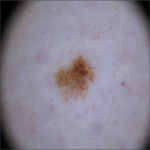

In [0]:
colorPixels.resize([150, 150])

In [0]:
df.tail(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67460,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
ISIC_0000079.jpg,42,42,42,24,24,24,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,25,25,25,26,26,26,26,...,104,94,90,97,89,85,90,81,80,85,78,78,82,75,74,79,69,68,73,64,62,65,59,54,56,48,47,48,43,43,43,39,39,39,32,32,32,45,45,45


In [0]:
from PIL import Image
import pathlib
import pandas as pd
import numpy as np
Path = pathlib.Path

In [0]:
from PIL import Image
import pathlib
import pandas as pd
import numpy as np
import os
Path = pathlib.Path

p = Path('/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/')
df = pd.DataFrame()
for child in p.iterdir(): 
    print (str(child))
    if str(child).endswith('.jpg'):
        colorImg = Image.open(str(child))
        colorPixels = colorImg.convert("RGB")
        colorArray = np.array(colorPixels.resize([150, 150]).getdata()).reshape([1, 150*150*3])
        path=os.path.splitext(child)[0]
        if df.empty:
            df = pd.DataFrame(colorArray, index = [str(path).split('/')[-1]])
        else:
            df = df.append(pd.DataFrame(colorArray, index = [str(path).split('/')[-1]]))


/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/ISIC_0006350.jpg
/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/ISIC_0006795.jpg
/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/ISIC_0006326.jpg
/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/ISIC_0006114.jpg
/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/ISIC_0005787.jpg
/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/ISIC_0007087.jpg
/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/ISIC_0008280.jpg
/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/ISIC_0008236.jpg
/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/ISIC_0007475.jpg
/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/ISIC_0007557.jpg
/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/ISIC_0008145.jpg
/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/ISIC_0007760.jpg
/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/ISIC_0008029.jpg
/content/drive/My Drive/I

In [0]:
df.to_csv("/content/drive/My Drive/MaitreiyiWork/ImageDataOnly.csv")

In [0]:
df.to_pickle("/content/drive/My Drive/MaitreiyiWork/ImageDataOnly.pickle")

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67460,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
ISIC_0006350,132,115,94,134,114,93,138,116,96,140,118,98,151,136,120,148,128,110,146,127,107,149,131,113,150,133,115,152,138,122,154,141,126,151,135,117,157,142,125,159,...,129,152,125,114,153,126,115,157,134,126,154,129,118,148,124,110,143,119,104,138,114,97,140,116,100,142,120,108,141,120,111,142,120,109,142,124,114,140,125,116
ISIC_0006795,12,12,12,12,12,12,12,12,12,11,11,12,10,10,10,10,10,10,10,10,10,8,8,8,11,11,11,98,88,79,130,115,103,132,116,104,135,123,111,136,...,129,159,139,126,159,139,126,159,140,126,160,143,131,160,145,137,160,147,139,159,145,136,156,141,131,153,137,128,150,136,128,151,140,135,148,134,125,145,132,125
ISIC_0006326,178,151,127,175,145,120,174,144,119,180,150,124,179,146,120,180,145,119,184,148,121,195,160,132,200,162,134,200,161,132,205,169,144,207,171,146,205,169,144,208,...,153,202,171,153,203,172,154,204,172,154,203,172,153,197,165,143,194,161,138,196,160,136,198,163,143,193,159,138,184,148,124,181,150,128,180,152,134,182,155,136
ISIC_0006114,157,142,125,164,150,128,170,150,128,171,150,127,176,155,133,183,159,138,195,171,156,188,159,136,191,160,136,195,165,143,194,166,145,200,172,150,200,165,141,197,...,63,255,147,53,255,151,64,255,139,55,255,121,37,252,109,27,245,118,45,244,125,64,225,141,103,219,152,122,220,169,147,214,166,143,201,135,113,221,145,118
ISIC_0005787,141,125,112,139,128,118,131,116,105,144,125,110,150,132,117,150,132,118,149,131,118,158,137,121,161,141,127,158,136,118,161,141,127,165,149,137,167,152,142,168,...,148,179,155,150,178,154,146,176,150,141,173,146,135,172,144,133,169,142,130,171,145,134,170,145,135,161,137,126,156,131,116,153,130,119,157,136,124,154,133,122


In [0]:
df.min().min(), df.max().max()

(0, 255)

In [0]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67460,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
ISIC_0006612,37,38,40,94,77,74,167,134,124,168,134,126,174,143,136,178,150,139,179,149,135,187,154,140,186,150,135,186,150,135,187,148,133,188,149,134,190,153,137,189,...,140,181,149,137,178,145,133,179,146,134,118,93,86,21,20,22,27,26,29,43,43,46,38,38,42,32,31,34,30,28,31,29,28,30,32,30,34,28,26,29
ISIC_0006800,126,121,107,128,114,94,128,115,96,127,115,95,128,113,91,127,114,92,130,120,103,133,121,102,134,124,103,136,125,105,138,123,98,142,130,107,143,131,110,147,...,130,156,141,127,156,140,125,156,141,127,155,140,127,153,138,125,152,138,125,149,135,121,147,130,113,146,129,113,144,122,103,142,124,107,140,124,110,140,127,113
ISIC_0006940,16,16,17,15,15,17,15,15,17,14,14,15,13,13,14,12,12,14,12,12,13,8,8,9,84,74,63,147,130,115,151,136,122,156,139,125,159,142,127,162,...,140,173,160,158,169,154,150,172,152,143,180,164,157,148,120,102,150,124,108,158,138,132,146,127,122,146,128,126,141,122,120,135,114,113,133,109,104,129,102,97
ISIC_0005666,92,68,50,103,89,76,125,112,99,126,117,104,124,112,98,115,101,89,123,97,80,127,91,68,128,90,66,128,90,65,134,104,83,140,110,90,142,111,89,152,...,131,165,145,130,163,143,128,161,141,125,159,136,117,157,134,116,161,141,127,161,143,129,154,134,117,146,128,112,142,123,107,142,125,109,141,125,109,139,121,106
ISIC_0006776,164,137,109,159,129,101,157,125,97,162,129,100,161,129,101,164,130,101,166,132,102,175,141,110,178,142,111,178,142,108,181,146,111,182,145,110,183,147,112,183,...,118,176,142,115,177,144,120,175,145,122,173,143,120,170,140,114,169,144,122,169,147,130,167,142,121,164,153,141,157,142,130,157,144,133,147,123,110,146,122,111


In [0]:
#df1=pd.DataFrame()
df1=pd.read_csv("/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_GroundTruth.csv",header=None)

In [0]:
df1.rename(columns = {0:"img", 1:"y"}, inplace=True)
df1.set_index('img', inplace=True)

In [0]:
df1.head()

,y
img,
ISIC_0000000,benign
ISIC_0000001,benign
ISIC_0000002,malignant
ISIC_0000004,malignant
ISIC_0000006,benign


In [0]:
finaldf=pd.concat([df, df1], axis=1, join='inner').sort_index()
finaldf.to_csv("/content/drive/My Drive/MaitreiyiWork/Data.csv")

In [0]:
finaldf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,y
ISIC_0000000,172,194,222,161,189,222,162,198,231,164,202,233,165,203,235,167,204,237,169,206,238,173,209,239,174,210,240,176,211,241,178,213,242,179,213,243,182,213,242,182,...,197,231,249,197,231,249,196,230,248,196,231,249,194,230,250,193,229,250,195,229,250,196,229,250,194,229,249,193,230,248,194,230,249,194,229,248,195,231,250,benign
ISIC_0000001,156,155,162,146,145,152,150,148,154,153,150,156,157,155,160,160,158,161,163,160,163,165,163,169,166,163,170,169,167,172,171,170,176,175,173,178,175,174,176,177,...,189,189,198,189,189,197,190,190,196,191,191,197,190,190,198,188,188,197,190,189,196,190,189,195,187,187,193,186,186,193,185,185,191,185,183,192,191,189,197,benign
ISIC_0000002,66,66,66,40,40,40,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,40,41,40,41,43,40,43,...,132,157,203,123,147,192,115,137,180,110,133,177,103,130,177,98,122,165,90,113,158,81,101,149,73,91,132,64,82,110,57,71,91,53,60,71,70,74,81,malignant
ISIC_0000004,64,64,64,38,38,38,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,...,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,61,61,61,malignant
ISIC_0000006,66,66,66,40,40,40,41,41,41,41,41,41,41,41,41,41,41,41,40,40,40,41,41,41,41,41,41,41,41,41,40,40,40,41,41,41,43,45,44,45,...,116,132,151,110,123,143,109,118,143,102,112,135,94,102,124,87,95,117,81,88,105,75,82,92,66,74,81,62,66,72,58,59,63,47,51,52,68,69,67,benign


In [0]:
finaldf=pd.concat([df1, df], axis=1, join='inner').sort_index()


In [0]:
finaldf.to_csv("/content/drive/My Drive/MaitreiyiWork/ImageDataWithLabels.csv")
finaldf.to_pickle("/content/drive/My Drive/MaitreiyiWork/ImageDataWithLabels.pickle")

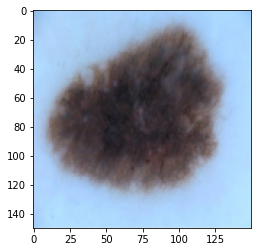

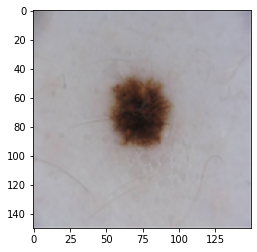

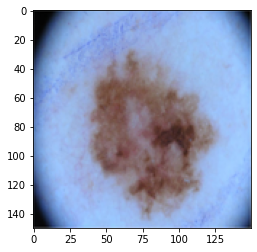

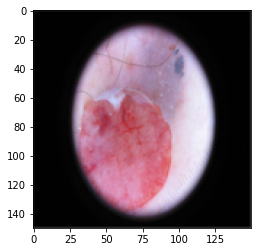

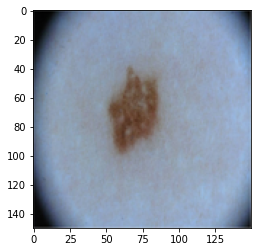

In [0]:
import matplotlib.pyplot as plt
for img_idx in range(5):
    plt.imshow(finaldf.iloc[img_idx, 1:].astype(int).values.reshape([150,150,3]))
    plt.show()

In [0]:
finaldf.iloc[0, 1:]

0        172
1        194
2        222
3        161
4        189
        ... 
67495    229
67496    248
67497    195
67498    231
67499    250
Name: ISIC_0000000, Length: 67500, dtype: object